In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import numpy as np

## 1. Load Dataset

In [5]:
cancer=load_breast_cancer()

## Cancer Data Analysis

In [6]:
# cancer 데이터의 속성값을 할당
X=cancer.data

# cancer 데이터의 라벨 할당
y=cancer.target
print(cancer.feature_names)
print("*"*70)
print(cancer.target_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
**********************************************************************
['malignant' 'benign']


In [7]:
print(dir(cancer))
# 악성/양성 라벨의 개수를 알아볼 수 있음
print(np.bincount(cancer.target))
print(cancer.target[cancer.target==0].shape)
print(cancer.DESCR)

['DESCR', 'data', 'feature_names', 'filename', 'frame', 'target', 'target_names']
[212 357]
(212,)
.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features 

In [8]:
print("1. cancer.keys : \n{}".format(cancer.keys()))
print("*"*70)
print("2. shape of Cancer : \n{}".format(cancer.data.shape))
print("*"*70)
print("3. Sample Counts per class : \n{}".format(
        {n:v for n,v in zip(cancer.target_names,np.bincount(cancer.target))}
        ))
print("*"*70)
print("4. Feature Names : \n{}".format(cancer.feature_names))

1. cancer.keys : 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
**********************************************************************
2. shape of Cancer : 
(569, 30)
**********************************************************************
3. Sample Counts per class : 
{'malignant': 212, 'benign': 357}
**********************************************************************
4. Feature Names : 
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [9]:
for i, name in enumerate(cancer.feature_names):
    print("%02d : %s" %(i,name))

00 : mean radius
01 : mean texture
02 : mean perimeter
03 : mean area
04 : mean smoothness
05 : mean compactness
06 : mean concavity
07 : mean concave points
08 : mean symmetry
09 : mean fractal dimension
10 : radius error
11 : texture error
12 : perimeter error
13 : area error
14 : smoothness error
15 : compactness error
16 : concavity error
17 : concave points error
18 : symmetry error
19 : fractal dimension error
20 : worst radius
21 : worst texture
22 : worst perimeter
23 : worst area
24 : worst smoothness
25 : worst compactness
26 : worst concavity
27 : worst concave points
28 : worst symmetry
29 : worst fractal dimension


## 2. Training / Test Data Split

In [10]:
# stratify=cancer.target : 바이너리 데이터일 때, Target이 25%(0), 75%(1)의 비율로 유지되며 라벨 데이터를 분할할 때 사용
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=cancer.target,random_state=42)

## 3. Model 생성과 학습

In [11]:
dTree=DecisionTreeClassifier()
dTree.fit(X_train,y_train)

DecisionTreeClassifier()

## 4. 예측

In [12]:
pred=dTree.predict(X_test)

## 5. Model Evaluate

In [13]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,pred,normalize=True)
# normalize=True : 맞춘 확률, False라고 지정하면 맞은 개수
score
# dTree.score(X_test,y_test)

0.9122807017543859

## Pruning
    기대효과 : 가지치기를 해서 훈련세트 오버피팅 비율은 낮추고 테스트 데이터 정확도는 높인다

In [14]:
dTree = DecisionTreeClassifier(max_depth=4,random_state=0)
dTree.fit(X_train,y_train)

print("훈련세트 데이터 정확도 : \n{}".format(dTree.score(X_train,y_train)))
print("테스트 데이터 정확도 : \n{}".format(dTree.score(X_test,y_test)))

훈련세트 데이터 정확도 : 
0.9868131868131869
테스트 데이터 정확도 : 
0.9473684210526315


## Feature 중요도

In [15]:
# Feature 중요도
dTree.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.00954637, 0.04578469, 0.        , 0.00315729, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.73354757, 0.04416574, 0.        , 0.        , 0.01332729,
       0.        , 0.01716116, 0.12202752, 0.01128236, 0.        ])

## 특성 중요도 시각화

In [16]:
import matplotlib.pyplot as plt
import numpy as np

cancer.data.shape

(569, 30)

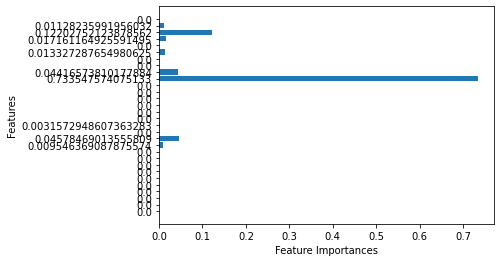

In [17]:
def plot_feature_importanxes_cancer(model):
    n_feature=cancer.data.shape[1]
    plt.barh(range(n_feature),model.feature_importances_,align="center")
    plt.yticks(np.arange(n_feature),dTree.feature_importances_)
    plt.xlabel("Feature Importances")
    plt.ylabel("Features")
    
plot_feature_importanxes_cancer(dTree)

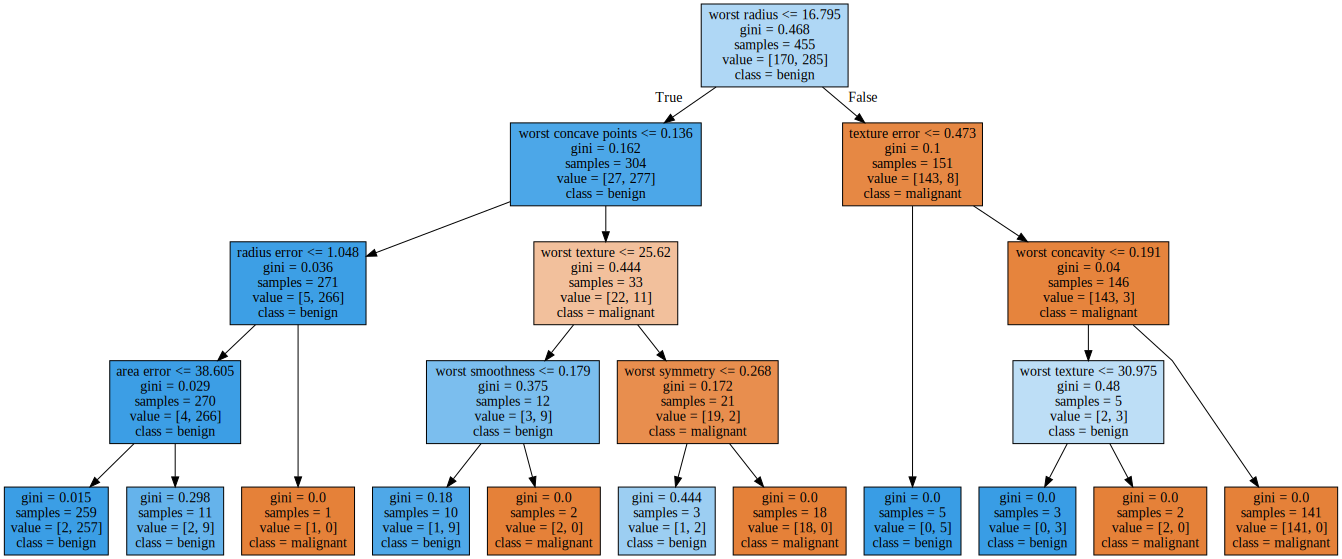

'dTree.pdf.pdf'

In [18]:
import graphviz
from sklearn.tree import export_graphviz
export_graphviz(dTree,out_file="dTree.txt",
                class_names=cancer.target_names,
                feature_names=cancer.feature_names,
               filled=True,leaves_parallel=True,
               impurity=True)
with open("dTree.txt",encoding="utf-8") as f:
    dot_graph=f.read();
dot=graphviz.Source(dot_graph)
display(dot)
dot.render(filename="dTree.pdf")